In [1]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [2]:
# Importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading data
house_data = pd.read_csv('House Price Assignment.csv')

In [4]:
# Checking data
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [5]:
# Shape of the data
house_data.shape

(2919, 81)

In [6]:
# Checking for null values in the target variable
house_data['SalePrice'].isnull().sum()

1459

In [7]:
# Found null values in the data so assuming null values data to be test data. Diving data to train and test data
train_house_data = house_data[~ house_data['SalePrice'].isnull()]

In [8]:
train_house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [9]:
test_house_data = house_data[house_data['SalePrice'].isnull()]

### Correlation

<AxesSubplot:>

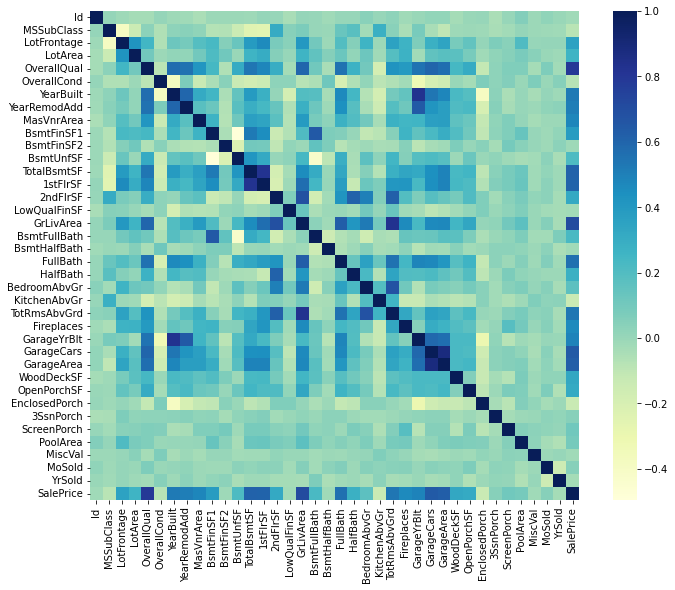

In [10]:
correlation_matrix = train_house_data.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_matrix, square=True, cmap='YlGnBu')

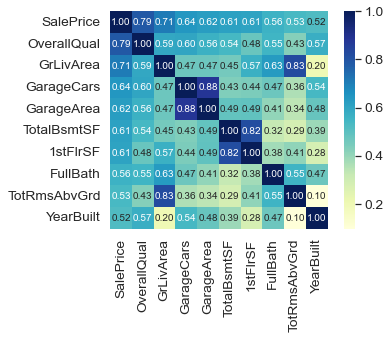

In [11]:
# Zoomed correlation plot with top correlated values from above 
zoom_correlation_features = 10
correlated_columns = correlation_matrix.nlargest(zoom_correlation_features, 'SalePrice')['SalePrice'].index
zoom_correlation_matrix = np.corrcoef(train_house_data[correlated_columns].values.T)
sns.set(font_scale=1.25)
heat_map = sns.heatmap(zoom_correlation_matrix, annot=True, square=True, cbar=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=correlated_columns.values, xticklabels=correlated_columns.values, cmap='YlGnBu')
plt.show()

#### GarageCars, GarageArea
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

Garage Cars and Garage Area represents same area. They are mostly correlated. So we can remove one of the variable. We can keep 'GarageCars' feature as it is more correlated with the target variable.

#### TotalBsmtSF, 1stFlrSF
TotalBsmtSF: Total square feet of basement area

1stFlrSF: First Floor square feet

In general TotalBsmtSF, 1stFlrSF are similar. Here both variables correlate. Wecan keep TotalBsmtSF.

#### TotRmsAbvGrd, GrLivArea
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

GrLivArea: Above grade (ground) living area square feet

This also represents same area and both variables correlate with each other. So considering 'GrLivArea'

### Scatterplot

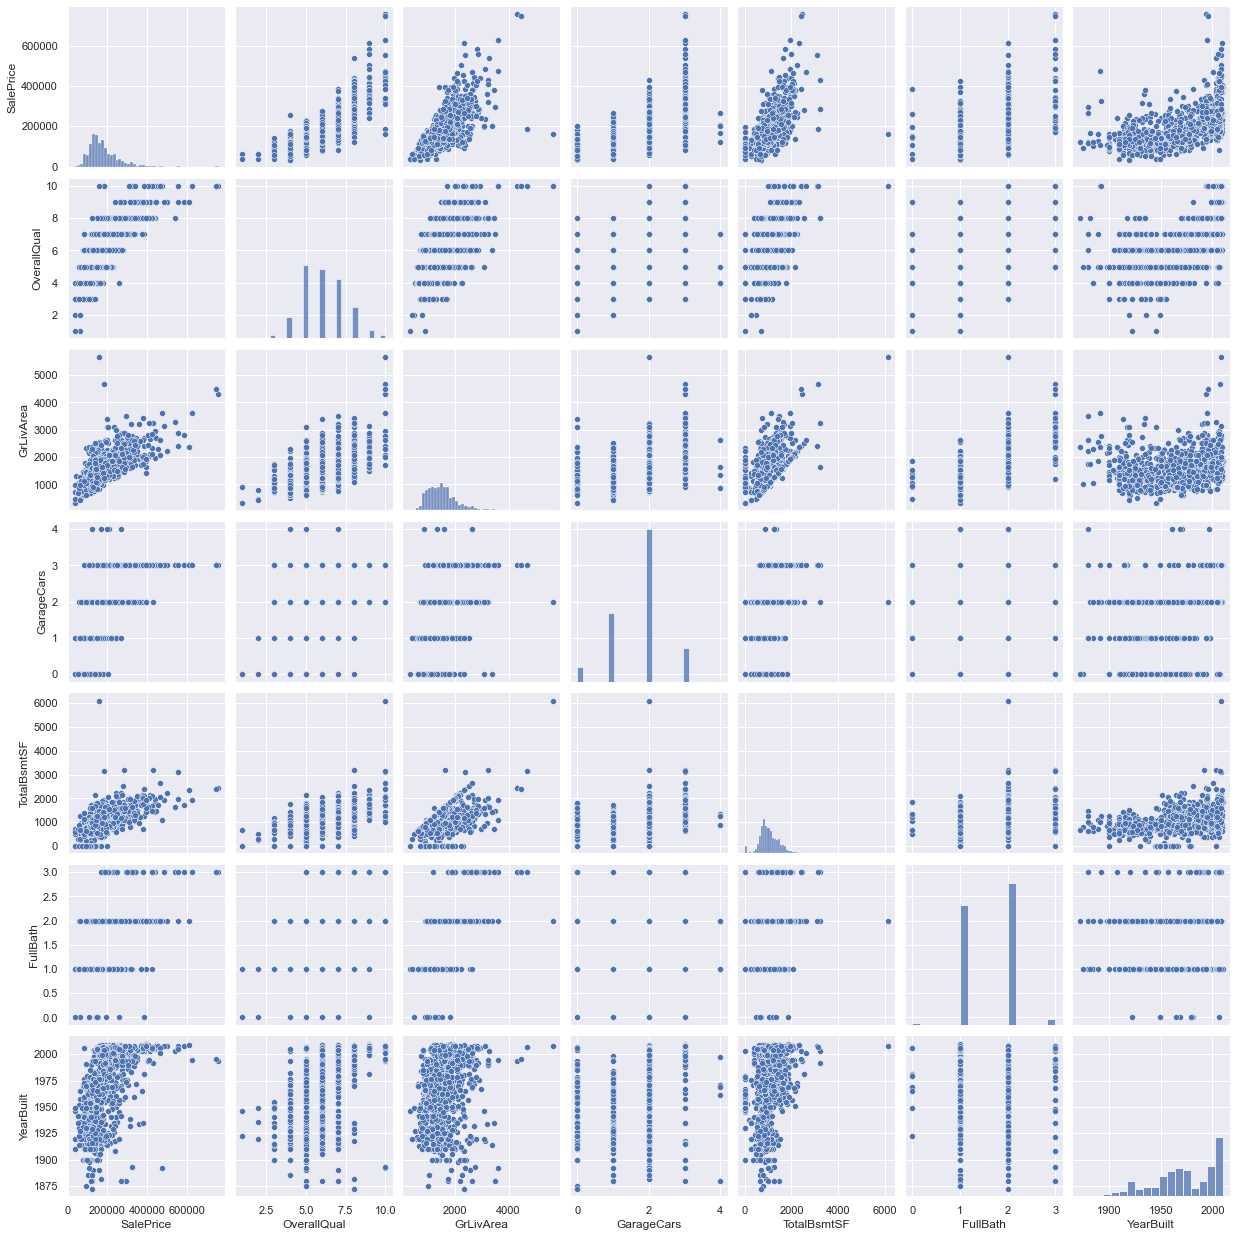

In [12]:
sns.set()
features_scatterplot = [ 'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt' ]
sns.pairplot(train_house_data[features_scatterplot], size = 2.5)
plt.show()

In the above figures 'TotalBsmtSF' vs 'GrLiveArea' seems intresting.  In this figure we can see the dots drawing a linear line, which almost acts like a border.

'SalePrice' vs 'YearBuilt'  we can see some tendensy to form exponentional curve.

## Outliers

#### Sale price data analysis

In [13]:
# Standardising data
# Importing required libraries
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(train_house_data['SalePrice'][:,np.newaxis])
# Observing fisrt 10 and last values
print('After sorting 10 low values \n', saleprice_scaled[saleprice_scaled[:,0].argsort()][:10])
print('After sorting 10 high values \n', saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:])


After sorting 10 low values 
 [[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]
After sorting 10 high values 
 [[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


We can see high values are far from '0' with value '7'

#### Analysing scatter plots

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

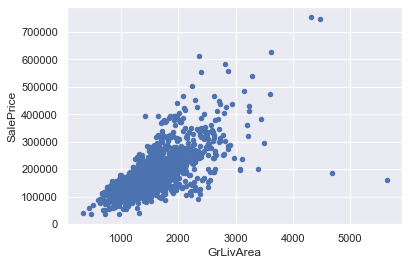

In [14]:
GrLivArea_SalePrice = pd.concat([train_house_data['SalePrice'], train_house_data['GrLivArea']], axis=1)
GrLivArea_SalePrice.plot.scatter(x='GrLivArea', y='SalePrice')

We can see that bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.

In [15]:
# Deleting outliers
train_house_data = train_house_data.drop(train_house_data[(train_house_data['GrLivArea'] > 4000) & (train_house_data['SalePrice'] < 300000)].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

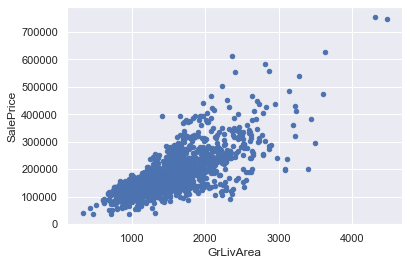

In [16]:
# Checking the graph 
GrLivArea_SalePrice = pd.concat([train_house_data['SalePrice'], train_house_data['GrLivArea']], axis=1)
GrLivArea_SalePrice.plot.scatter(x='GrLivArea', y='SalePrice')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

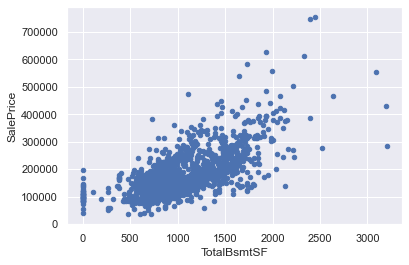

In [17]:
TotalBsmtSF_SalePrice = pd.concat([train_house_data['SalePrice'], train_house_data['TotalBsmtSF']], axis=1)
TotalBsmtSF_SalePrice.plot.scatter(x='TotalBsmtSF', y='SalePrice')

## Target variable analysis


 mu = 180932.92 and sigma = 79467.79



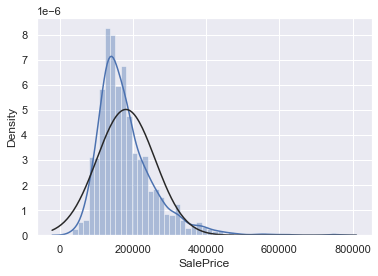

In [18]:
from scipy.stats import norm
sns.distplot(train_house_data['SalePrice'], fit=norm)
(mu, sigma) = norm.fit(train_house_data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

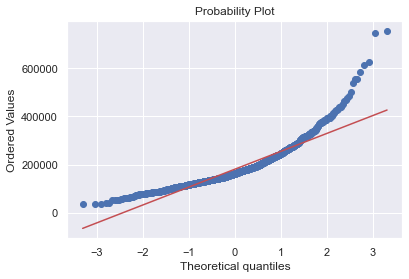

In [19]:
from scipy import stats
fig = plt.figure()
res = stats.probplot(train_house_data['SalePrice'], plot = plt)
plt.show()
            

We can see that the data is positively skewed. We can make positivly skewed data to normal by apply log to the values. To avoid '0' issues applying log to (1+x)

In [20]:
train_house_data['SalePrice'] = np.log1p(train_house_data['SalePrice'])
            


 mu = 12.02 and sigma = 0.40



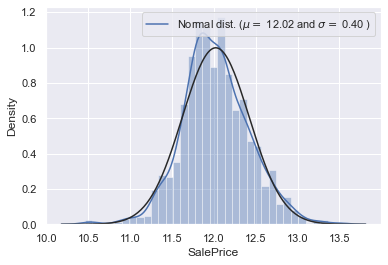

In [21]:
# Checking the data after applying log transformation
from scipy.stats import norm
sns.distplot(train_house_data['SalePrice'], fit=norm)
(mu, sigma) = norm.fit(train_house_data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

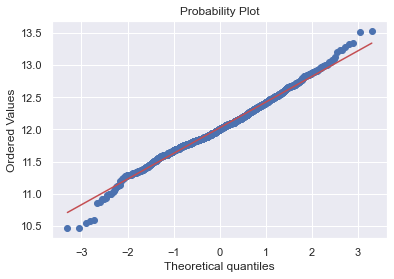

In [22]:
fig = plt.figure()
res = stats.probplot(train_house_data['SalePrice'], plot = plt)
plt.show()

In [23]:
train_sale_price = train_house_data['SalePrice']

In [24]:
train_house_data = train_house_data.drop(columns=['SalePrice'], axis=1)

In [25]:
test_house_data = test_house_data.drop(columns=['SalePrice'], axis=1)

In [26]:
house_data_all = pd.concat((train_house_data, test_house_data)).reset_index(drop=True)

## Missing data

In [27]:
# Calculating missing percentage in the data.
missing_values = house_data_all.isnull().sum()

# Calculating missing percentage 
missing_data_persentage = ( house_data_all.isnull().sum() / len(house_data_all) ) * 100
missing_data = pd.concat([missing_values, missing_data_persentage], axis=1, keys=['Missing values total', 'Missing persentage'])

# Getting only missing data
missing_data = missing_data[missing_data['Missing persentage'] != 0].sort_values('Missing persentage', ascending=False)

# Abserving the missing data
missing_data

,Missing values total,Missing persentage
PoolQC,2908,99.691464
MiscFeature,2812,96.400411
Alley,2719,93.212204
Fence,2346,80.425094
FireplaceQu,1420,48.680151
LotFrontage,486,16.660953
GarageFinish,159,5.450806
GarageQual,159,5.450806
GarageCond,159,5.450806
GarageYrBlt,159,5.450806


Text(0.5, 1.0, 'Percentage of missing data by feature')

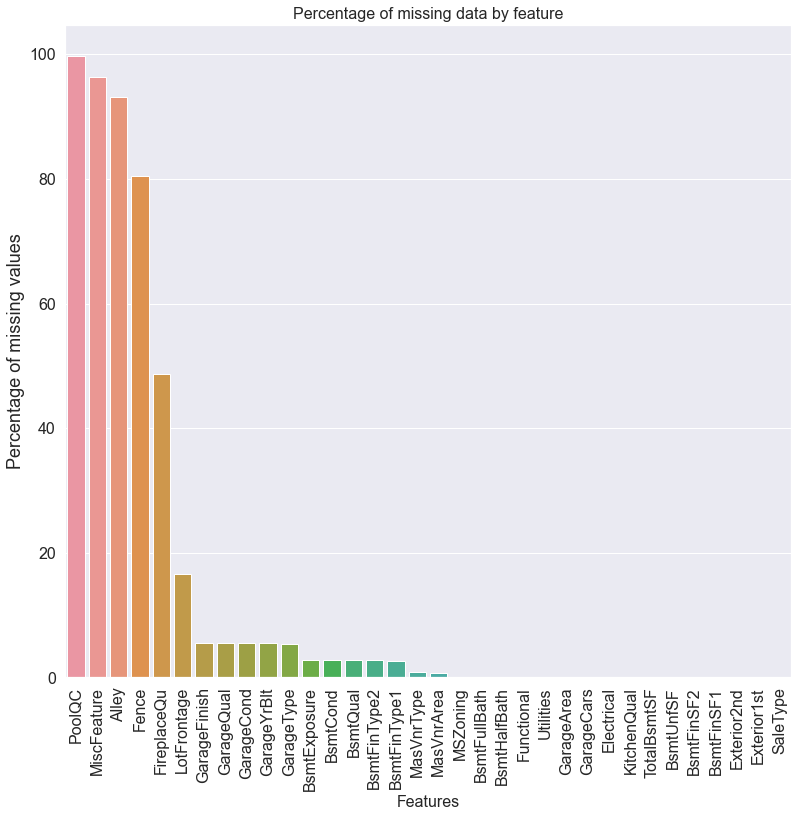

In [28]:
# Plotting missing data.
plt.subplots(figsize=(13, 12))
plt.xticks(rotation='90', fontsize=16)
plt.yticks(fontsize=16)
sns.barplot(x=missing_data.index, y=missing_data['Missing persentage'])
plt.xlabel('Features', fontsize=16)
plt.ylabel('Percentage of missing values', fontsize=18)
plt.title('Percentage of missing data by feature', fontsize=16)


Since more than 80% data is mssing in PoolQC, MiscFeature, Alley, Fence features we can remove the features. 


In [29]:
# Replacing missing values
none_data_columns = ['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for column in none_data_columns:
    house_data_all[column] = house_data_all[column].fillna('None')

# Replacing None with mode   
mode_data_columns = ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']
for column in mode_data_columns:
    house_data_all[column] = house_data_all[column].fillna(house_data_all[column].mode()[0])

# Replacing Zero filling values
zero_fill_columns = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']
for column in zero_fill_columns:
    house_data_all[column] = house_data_all[column].fillna(0)

Replacing 'LotFrontage' by neighborhood values

In [30]:
house_data_all['LotFrontage'] = house_data_all.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [31]:
# Removing utilities data
house_data_all = house_data_all.drop(columns = ['Utilities', 'PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)

In [32]:
house_data_all['Functional'] = house_data_all['Functional'].fillna('Typ')

### Observing data

In [33]:
# Calculating missing percentage in the data.
missing_values = house_data_all.isnull().sum()

# Calculating missing percentage 
missing_data_persentage = ( house_data_all.isnull().sum() / len(house_data_all) ) * 100
missing_data = pd.concat([missing_values, missing_data_persentage], axis=1, keys=['Missing values total', 'Missing persentage'])

# Getting only missing data
missing_data = missing_data[missing_data['Missing persentage'] != 0].sort_values('Missing persentage', ascending=False)

# Abserving the missing data
missing_data

,Missing values total,Missing persentage


In [34]:
# Converting some numerical data into categorical data because they are actually categorical data
numerical_to_categorical = ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']
for column in numerical_to_categorical:
    house_data_all[column] = house_data_all[column].astype(str)

In [35]:
# Label encoding some features
from sklearn.preprocessing import LabelEncoder
columns_to_labels = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']
encoder = LabelEncoder()
for column in columns_to_labels:
    encoder.fit(list(house_data_all[column].values))
    house_data_all[column] = encoder.transform(list(house_data_all[column].values))
    
print(house_data_all.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   1          10       RL         65.0     8450       1         3   
1   2           5       RL         80.0     9600       1         3   
2   3          10       RL         68.0    11250       1         0   
3   4          11       RL         60.0     9550       1         0   
4   5          10       RL         84.0    14260       1         0   

  LandContour LotConfig  LandSlope  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0         Lvl    Inside          0  ...          61             0         0   
1         Lvl       FR2          0  ...           0             0         0   
2         Lvl    Inside          0  ...          42             0         0   
3         Lvl    Corner          0  ...          35           272         0   
4         Lvl       FR2          0  ...          84             0         0   

  ScreenPorch PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition  
0           0        0        

In [36]:
# Adding another most important feature
house_data_all['TotalSF'] = house_data_all['TotalBsmtSF'] + house_data_all['1stFlrSF'] + house_data_all['2ndFlrSF']

## Skewness

In [37]:
# Finging numerical features
numerical_features = house_data_all.dtypes[house_data_all.dtypes != 'object'].index

In [38]:
# Calculating skewness
from scipy.stats import skew
skewness_in_features = house_data_all[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness_in_features = pd.DataFrame(skewness_in_features, columns=['Skewness in features'])

               Skewness in features
MiscVal                   21.939672
PoolArea                  17.688664
LotArea                   13.109495
LowQualFinSF              12.084539
3SsnPorch                 11.372080
LandSlope                  4.973254
KitchenAbvGr               4.300550
BsmtFinSF2                 4.144503
EnclosedPorch              4.002344
ScreenPorch                3.945101
BsmtHalfBath               3.929996
MasVnrArea                 2.621719
OpenPorchSF                2.529358
WoodDeckSF                 1.844792
1stFlrSF                   1.257286
LotFrontage                1.103039
GrLivArea                  1.068750
TotalSF                    1.009157
BsmtFinSF1                 0.980645
BsmtUnfSF                  0.919688
2ndFlrSF                   0.861556
TotRmsAbvGrd               0.749232
Fireplaces                 0.725278
HalfBath                   0.696666
TotalBsmtSF                0.671751
BsmtFullBath               0.622415
OverallCond                0

Text(0.5, 1.0, 'Skewness of data by feature')

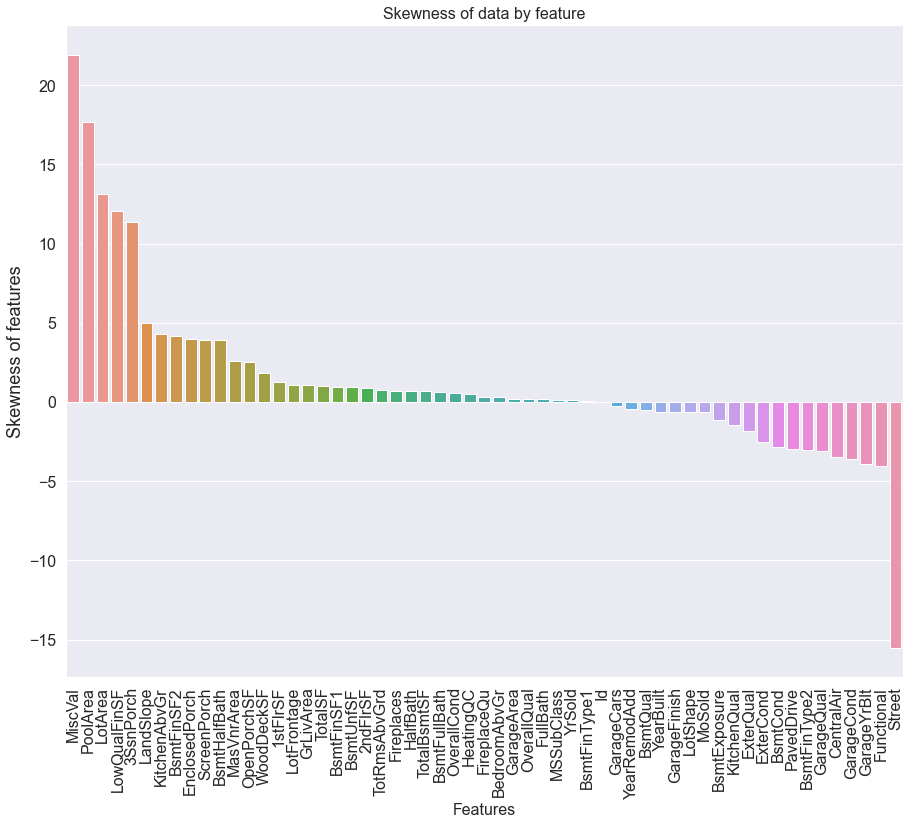

In [39]:
# Checking skewness
print(skewness_in_features)

# Visualising skeness in data
plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90', fontsize=16)
plt.yticks(fontsize=16)
sns.barplot(x=skewness_in_features.index, y=skewness_in_features['Skewness in features'])
plt.xlabel('Features', fontsize=16)
plt.ylabel('Skewness of features', fontsize=18)
plt.title('Skewness of data by feature', fontsize=16)

## Reducing skewness in the data

In [40]:
# Getting right skewed features
right_skwed_features = skewness_in_features[skewness_in_features > 0.5].dropna()

In [41]:
# Importing required libraries
from scipy.special import boxcox1p

# Extracting index of right skewed data
right_skwed_features_index = right_skwed_features.index

# Declaring lambda value
lam = 0.15

# Applying boxcox transformation
for feature in right_skwed_features_index:
    house_data_all[feature] = boxcox1p(house_data_all[feature], lam)

In [42]:
# Getting left skewed data
left_skwed_features = skewness_in_features[skewness_in_features < -0.5].dropna()

In [43]:

# Extracting index of left skewed data
left_skwed_features_index = left_skwed_features.index

# Squaring the data to reduce left skeness
for feature in left_skwed_features_index:
    house_data_all[feature] = house_data_all[feature].apply(lambda x:x**3)

               Skewness in features
PoolArea                  15.759529
3SsnPorch                  8.921650
LowQualFinSF               8.741030
MiscVal                    5.594963
LandSlope                  4.530264
BsmtHalfBath               3.786685
KitchenAbvGr               3.697303
ScreenPorch                2.977052
BsmtFinSF2                 2.563235
EnclosedPorch              2.024321
MoSold                     0.750575
MasVnrArea                 0.637388
HalfBath                   0.592548
HeatingQC                  0.485534
BsmtFullBath               0.441787
FireplaceQu                0.332611
2ndFlrSF                   0.328879
BedroomAbvGr               0.326568
Fireplaces                 0.285310
BsmtExposure               0.225754
WoodDeckSF                 0.224181
GarageArea                 0.216857
OverallQual                0.189591
1stFlrSF                   0.179117
LotArea                    0.177735
FullBath                   0.165514
MSSubClass                 0

Text(0.5, 1.0, 'Skewness of data by feature')

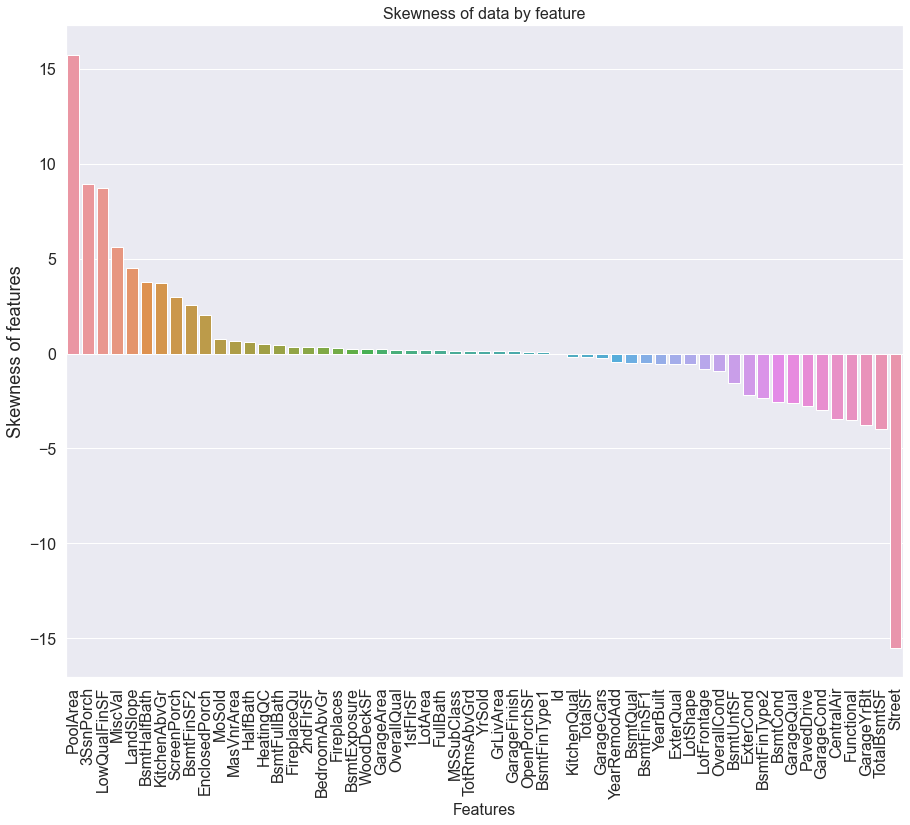

In [44]:
# Checking skewness
skewness_in_features = house_data_all[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness_in_features = pd.DataFrame(skewness_in_features, columns=['Skewness in features'])
print(skewness_in_features)
plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90', fontsize=16)
plt.yticks(fontsize=16)
sns.barplot(x=skewness_in_features.index, y=skewness_in_features['Skewness in features'])
plt.xlabel('Features', fontsize=16)
plt.ylabel('Skewness of features', fontsize=18)
plt.title('Skewness of data by feature', fontsize=16)

In [45]:
# Removing index variable
house_data_all = house_data_all.drop(columns=['Id'], axis=1)

In [46]:

house_data_all = house_data_all.drop(columns=['GarageArea', '1stFlrSF', 'TotRmsAbvGrd'], axis=1)

In [47]:
# Getting dummy variables
house_data_all = pd.get_dummies(house_data_all)

In [48]:
# Shape of the train data
house_data_all.shape

(2917, 209)

In [49]:
train_size = train_house_data.shape[0]

In [50]:
train_data = house_data_all[:train_size]
test_data = house_data_all[train_size:]

## Modelling

In [51]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
#import lightgbm as lgb

In [52]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_data.values)
    rmse= np.sqrt(-cross_val_score(model, train_data.values, train_sale_price, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [53]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [54]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [55]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [56]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [57]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [58]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1111 (0.0059)



In [59]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1110 (0.0060)



In [60]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.8625 (0.1448)



In [61]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1169 (0.0063)



In [62]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[23:17:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:17:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:17:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

# Stacking Models

### Averaged base models class:

In [63]:
# Defining class to average models
class Averaging(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # Defining clons of the original model
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Training cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Pridicting cloned models and averaging them.
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [64]:
averaged_models = Averaging(models = (ENet, GBoost, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1083 (0.0059)



We can observe that by simple stacking we got better score.

In [65]:
# Defining rmsele function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

### Getting final output

In [66]:
avg = averaged_models.fit(train_data, train_sale_price)

In [67]:
final_predictions = np.expm1(avg.predict(test_data))

In [68]:
# Writing to a csv file
final_predictions = pd.DataFrame(final_predictions)

final_predictions.to_csv('houseprices.csv')